# Ćwiczenie 3
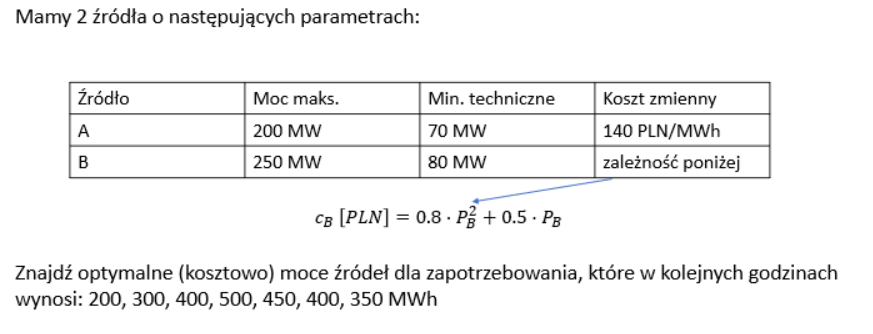

In [1]:
using JuMP
using Ipopt

m = Model(solver = IpoptSolver())

demand = [200, 300, 400, 500, 450, 400, 350]
hours = length(demand)

@variable(m, 70  <= A[1:hours] <= 200)
@variable(m, 80  <= B[1:hours] <= 250)

for i in 1:hours
    @constraint(m,A[i]+B[i]==demand[i])
end


@objective(m,Min, sum(A[i]*140 + 0.8*B[i]^2+0.5*B[i] for i in 1:hours))

print(m)
    
status = solve(m)

Min 0.8 B[1]² + 0.8 B[2]² + 0.8 B[3]² + 0.8 B[4]² + 0.8 B[5]² + 0.8 B[6]² + 0.8 B[7]² + 140 A[1] + 0.5 B[1] + 140 A[2] + 0.5 B[2] + 140 A[3] + 0.5 B[3] + 140 A[4] + 0.5 B[4] + 140 A[5] + 0.5 B[5] + 140 A[6] + 0.5 B[6] + 140 A[7] + 0.5 B[7]
Subject to
 A[1] + B[1] == 200
 A[2] + B[2] == 300
 A[3] + B[3] == 400
 A[4] + B[4] == 500
 A[5] + B[5] == 450
 A[6] + B[6] == 400
 A[7] + B[7] == 350
 70 <= A[i] <= 200 for all i in {1,2,..,6,7}
 80 <= B[i] <= 250 for all i in {1,2,..,6,7}

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt docum

:Infeasible

Jak sprawdzić, które ograniczenie spowodowało, że zbiór możliwych rozwiązań jest pusty?

In [2]:
m = Model(solver = IpoptSolver())

demand = [200, 300, 400, 500, 450, 400, 350]
hours = length(demand)

@variable(m, 70  <= A[1:hours] <= 200)
@variable(m, 80  <= B[1:hours] <= 250)
# nowa zmienna
@variable(m, relax_demand[1:hours] >= 0)

# dodanie zmiennej dla poluzowania ograniczenia
for i in 1:hours
    @constraint(m,A[i]+B[i]+relax_demand[i]==demand[i])
end
        
# dodanie zmiennej do funkcji celu, tak aby byla rowna 0, jesli to mozliwe
@objective(m,Min, sum(A[i]*140 + 0.8*B[i]^2+0.5*B[i] +1e3*relax_demand[i] for i in 1:hours))

print(m)
    
status = solve(m)

Min 0.8 B[1]² + 0.8 B[2]² + 0.8 B[3]² + 0.8 B[4]² + 0.8 B[5]² + 0.8 B[6]² + 0.8 B[7]² + 140 A[1] + 0.5 B[1] + 1000 relax_demand[1] + 140 A[2] + 0.5 B[2] + 1000 relax_demand[2] + 140 A[3] + 0.5 B[3] + 1000 relax_demand[3] + 140 A[4] + 0.5 B[4] + 1000 relax_demand[4] + 140 A[5] + 0.5 B[5] + 1000 relax_demand[5] + 140 A[6] + 0.5 B[6] + 1000 relax_demand[6] + 140 A[7] + 0.5 B[7] + 1000 relax_demand[7]
Subject to
 A[1] + B[1] + relax_demand[1] == 200
 A[2] + B[2] + relax_demand[2] == 300
 A[3] + B[3] + relax_demand[3] == 400
 A[4] + B[4] + relax_demand[4] == 500
 A[5] + B[5] + relax_demand[5] == 450
 A[6] + B[6] + relax_demand[6] == 400
 A[7] + B[7] + relax_demand[7] == 350
 70 <= A[i] <= 200 for all i in {1,2,..,6,7}
 80 <= B[i] <= 250 for all i in {1,2,..,6,7}
 relax_demand[i] >= 0 for all i in {1,2,..,6,7}
This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint

:Optimal

In [3]:
println("A")
println(getvalue(A))
println("B")
println(getvalue(B))
println("A+B")
println(getvalue(A)+getvalue(B))
println(demand)
println(getvalue(relax_demand))

A
[112.813, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0]
B
[87.1875, 100.0, 200.0, 250.0, 250.0, 200.0, 150.0]
A+B
[200.0, 300.0, 400.0, 450.0, 450.0, 400.0, 350.0]
[200, 300, 400, 500, 450, 400, 350]
[0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0]


Widać, że w 4tej godzinie zapotrzebowanie było większe niż sumaryczna moc max obu źródeł.